## Source: kadenze - Creative Applications of Deep Learning with Tensorflow:
------------

In [1]:
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.python.framework import ops  # ops employs a method named reset_default_graph to reset the graph

import matplotlib
from matplotlib import pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

# Things to look for before marching to build Deep Networks
--------

* **Using Scope Variables**: We can create deep networks by writing individual code for each layers. In such a case if we want to go deeper say 10 layers deep, writing the same code would be redundant. Hence, we use scope to make the process more dynamic
* **Optimization**: Gradient Descent optimizer is a good optimizer, But why not use something with momentum and adaptive learning rate. Such optimizers are shown to be more powerfull in many applications. Example: Try *RMSPROP (when doing Batch learning)* and *ADAM optimizer (for general cases)* 

In [18]:
# Here we create a re-usable funtion to add linear networks layers
def linearActivation(x, numInputs, numOutputs, scope=None):
    with tf.variable_scope(scope or "linear"):
        w = tf.get_variable(
                dtype='float32',
                shape=[numInputs, numOutputs],
                initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1),
                name='weight')
        
        b = tf.get_variable(
                dtype='float32',
                shape=[numOutputs],
                initializer=tf.constant_initializer(),
                name='bias')
        
        y_pred = tf.matmul(x,w) + b
        
        return y_pred        

In [29]:
# Clear all graph if one exists:
ops.reset_default_graph()


# Sanity check if the graph is empty:
print ([op for op in tf.get_default_graph().get_operations()])

# Create a small dataSet:
numDataPoints = 1000
numFeatures = 1
X = np.array(np.linspace(-3,3,numDataPoints), dtype='float32')
X = X.reshape(numDataPoints, 1)

# Layer 1: Build the first layer
numHid1 = 10
y_pred1 = linearActivation(x=X, numInputs=numFeatures, numOutputs=numHid1, scope='Layer1')
print (y_pred1.get_shape())

# Let us now print all the operations in the network
[op for op in tf.get_default_graph().get_operations()]

[]
(1000, 10)


[<tf.Operation 'Layer1/weight/Initializer/random_normal/shape' type=Const>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal/mean' type=Const>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal/stddev' type=Const>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal/RandomStandardNormal' type=RandomStandardNormal>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal/mul' type=Mul>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal' type=Add>,
 <tf.Operation 'Layer1/weight' type=VariableV2>,
 <tf.Operation 'Layer1/weight/Assign' type=Assign>,
 <tf.Operation 'Layer1/weight/read' type=Identity>,
 <tf.Operation 'Layer1/bias/Initializer/Const' type=Const>,
 <tf.Operation 'Layer1/bias' type=VariableV2>,
 <tf.Operation 'Layer1/bias/Assign' type=Assign>,
 <tf.Operation 'Layer1/bias/read' type=Identity>,
 <tf.Operation 'Layer1/MatMul/a' type=Const>,
 <tf.Operation 'Layer1/MatMul' type=MatMul>,
 <tf.Operation 'Layer1/add' type=Add>]

In [30]:
# Layer 2:
numHid2 = 20
y_pred2 = linearActivation(x=y_pred1, numInputs=numHid1, numOutputs=numHid2, scope='Layer2')
print ("y_pred_2 dimensions", y_pred2.get_shape())

# Layer 3:
numHid3 = 20
y_pred3 = linearActivation(x=y_pred2, numInputs=numHid2, numOutputs=numHid3, scope='Layer3')
print ("y_pred_3 dimensions", y_pred3.get_shape())

# Layer 4:
numHid4 = 10
y_pred4 = linearActivation(x=y_pred3, numInputs=numHid3, numOutputs=numHid4, scope='Layer4')
print ("y_pred_4 dimensions", y_pred4.get_shape())

# Now lets print all the operations in the graph:
[op for op in tf.get_default_graph().get_operations()]

y_pred_2 dimensions (1000, 20)
y_pred_3 dimensions (1000, 20)
y_pred_4 dimensions (1000, 10)


[<tf.Operation 'Layer1/weight/Initializer/random_normal/shape' type=Const>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal/mean' type=Const>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal/stddev' type=Const>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal/RandomStandardNormal' type=RandomStandardNormal>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal/mul' type=Mul>,
 <tf.Operation 'Layer1/weight/Initializer/random_normal' type=Add>,
 <tf.Operation 'Layer1/weight' type=VariableV2>,
 <tf.Operation 'Layer1/weight/Assign' type=Assign>,
 <tf.Operation 'Layer1/weight/read' type=Identity>,
 <tf.Operation 'Layer1/bias/Initializer/Const' type=Const>,
 <tf.Operation 'Layer1/bias' type=VariableV2>,
 <tf.Operation 'Layer1/bias/Assign' type=Assign>,
 <tf.Operation 'Layer1/bias/read' type=Identity>,
 <tf.Operation 'Layer1/MatMul/a' type=Const>,
 <tf.Operation 'Layer1/MatMul' type=MatMul>,
 <tf.Operation 'Layer1/add' type=Add>,
 <tf.Operation 'Layer2/weight/Initia

# Painting an Image:
-----------

Objective: Here we would train a neural network on an image, where its learning task would be to learn the pixels values (R,B,G) given the x and y dimension of the image. As, evident teh iput to the image would be the x and y dimension and output would be [R,B,G] value for the input 2D cell.

What the network doest: After the network is trained we pass all the cell (x,y) dimensions one after another and hope that the network reconstruct the image. For example we pass input as [[1,1],[1,2],[1,3],[1,4],........[64,62],[64,63],[64,64]] and the output would be [[R,B,G],[R,B,G],[R,G,B],[R,G,B],.....[R,G,B],[R,G,B],[R,G,B]]

Lets venture the would of Creativity !!!

In [105]:
# We load an image:
from skimage.data import astronaut
from scipy.misc import imresize

Shape of the image:  (64, 64, 3)
Shape after reshape:  (64, 64, 3)


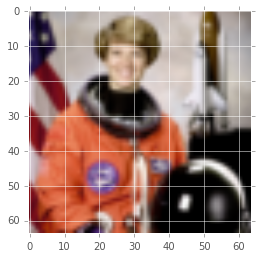

In [106]:
imgOrig = astronaut()
print ('Shape of the image: ', img.shape)

# The size is 512x512, a deep network would take much time to train on it.
# Why not resize the image
imgOrig = imresize(img, (64, 64))
print  ('Shape after reshape: ', imgOrig.shape)

plt.imshow(imgOrig)

### Data Preparation:
--------

Here we simply create the input data  that will be feed to the network and the output (RGB) values that we expect the network to learn from. We standarize the input, now this may seem a little weird, beacuse you may think that standarizing pixel values are understood, why the hack are we stanarizing input x,y indices or the row-colum index. 

Even if we dont standarize, our network would not behave weird because the range of values for each dimension is the same i.e 0-64. However, we should not forget that we are fitting a deep neural net, which comes with the problem of weight eplosion and weight vanish. 64 is not a very big number but with deep network we can think it to accumulate high +ve or -ve weight slowely but gradually, which may bring in the scenario of weight explosion. Therefore, just to be on the safer side we standarize the input. Moreover, the network doesnt care what input we give it, it will learn its best from the input, we just need to ensure that out test input goes through the same procedure as the training input.

**Note: We are not doing a column-wise standarization, we are standarizing the whole dataset based on one mean and standard deviation fetched from the whole dataset (the data from both the dimension). This is done to ensure that the inputs are not changed any way. Example input [[0,0],[0,1]] becomes [[-1.70519568 -1.70519568],[-1.70519568 -1.65106248]]** 

In [107]:
# Creating the input output data structure.
x = []
y = []

for row in np.arange(imgOrig.shape[0]):
    for col in np.arange(imgOrig.shape[1]):
        x.append([row, col])
        y.append(img[row,col])
        
# We shall converet our input into nd arrays.
X = np.array(x, dtype='float32')
Y = np.array(y, dtype='float32')
print ('The shape of X and Y are: ', X.shape, Y.shape)

# Standarizing the Input
X = (X-np.mean(X))/np.std(X)

The shape of X and Y are:  (4096, 2) (4096, 3)


### Build the Network:
---------

*** Cost Function and Optimization: ***

Since our problem is a (linear regression) continuous-pixel value prediction, we can simply use minimum square error as out cost/loss/error function.

We have the following :

* Y = [4096x3], i=4096, j=3
* y_hat = [4096x3], i=4096, j=3

Formula: 

$$error=\frac{\sum_{i=0}^{4096} \sum_{j=0}^{3} {(Y_{ij} - yhat_{ij})}^2}{4096}$$

In [118]:
def layerActivation(x, numInputs, numOutputs, nonlinearActivation=False, scope=None):
    with tf.variable_scope(scope or "linear"):
        w = tf.get_variable(
                dtype='float32',
                shape=[numInputs, numOutputs],
                initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1),
                name='weight')
        
        b = tf.get_variable(
                dtype='float32',
                shape=[numOutputs],
                initializer=tf.constant_initializer(),
                name='bias')
        
        y_pred = tf.matmul(x,w) + b
        
        if nonlinearActivation:
            y_pred = tf.nn.relu(y_pred)
        
        return y_pred  

    
    
def plotPred_image(pred):
    fig, axs = plt.subplots(1, 1)
    imgPred = np.clip(pred.reshape(imgOrig.shape), 0, 255).astype(np.uint8)
    axs.imshow(imgPred)
    plt.show()
    
    
def miniBatchLearning(xData, yData, y_pred, numDataPoints, batchSize, numBatches, numIteration=False):
    if not numIteration:
        numIteration = 500    
        
    print ('The mini Batch Size is: ', batchSize)
    print ('Number of mini batches is: ', numBatches)
    print ('Shape of xData is: ', xData.shape)
    print ('Shape of yData is: ', yData.shape)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

#         prev_trainingCost = 0.0

        for i in np.arange(numIteration):
            ###############################
            # Create indices for mini batch
            # It is good to provide different
            # combination of example as different
            # batches
            idxs = np.arange(numDataPoints)
            rand_idxs = np.random.permutation(idxs)
            ###############################
            
            # Call the mini batches
            for batch_i in range(numBatches):
                index = rand_idxs[batch_i * batchSize : (batch_i + 1) * batchSize]

                sess.run(optimizer, 
                         feed_dict={
                             x_tf : xData[index],
                             y_tf : yData[index]
                         })
            
            # We have updated our weights for all the minibatches for 1 iternation.
            # Now we need to compute the cost after each iteration using all the dataPoints.
            trainingCost = sess.run(cost,
                                   feed_dict={
                                       x_tf : xData,
                                       y_tf : yData
                                   })

            # After 100 consecutive iterations we compute the prediction and plot the image
            if (i%200 == 0 or i== numIteration-1):
                pred = y_pred.eval(feed_dict={x_tf : xData},
                                   session = sess)  
                # When we use the session in the eval(), 
                # then we ensure that the ouptut is computed by 
                # using the lastest values of the session sess
                
                
                print ("Epoch/Iteration: " + str(i+1)+ 
                       ", Training Error= " + str(trainingCost))
                
                # We should plot the output Image using the current predicted values
                # given all the inputs
                plotPred_image(pred)
                


#             prev_trainingCost = trainingCost

#### **Initialize Variables in the graph**

In [119]:
# First, we reset the graph
ops.reset_default_graph()

# Define how many layers and neurons units
unitsPerLayer = [2,28,64,128,128,64,28,3] # [numFeatures, numHid1, numHid2, numHid3,numHid4,numHid5, numhid[6], numOutput]

# create the network:

# Input Initialization
x_tf = tf.placeholder(dtype=tf.float32, shape=[None, unitsPerLayer[0]], name='xInputs')
y_tf = tf.placeholder(dtype=tf.float32, shape=[None, unitsPerLayer[7]], name='yInputs')

# Weight bias and network graph initialization
currentInput = x_tf
for layer_i in range(1,len(unitsPerLayer)):
    scope_i = "layer_"+ str(layer_i)

    currentInput = layerActivation(x = currentInput, 
                                   numInputs = unitsPerLayer[layer_i-1], 
                                   numOutputs = unitsPerLayer[layer_i],
                                   nonlinearActivation = True if (layer_i != len(unitsPerLayer)-1) else False,
                                   scope = scope_i)

y_tf_pred = currentInput

print ('The shape of the input x_tf is: ', x_tf)
print ('The shape of the input y_tf is: ', y_tf)
print ('The shape of output unit is: ', y_tf_pred.get_shape())
[op for op in tf.get_default_graph().get_operations()]

# Cost Function and Optimization:
cost = tf.reduce_mean(tf.squared_difference(y_tf, y_tf_pred))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

The shape of the input x_tf is:  Tensor("xInputs:0", shape=(?, 2), dtype=float32)
The shape of the input y_tf is:  Tensor("yInputs:0", shape=(?, 3), dtype=float32)
The shape of output unit is:  (?, 3)


#### ** Run the Graph**

The mini Batch Size is:  512
Number of mini batches is:  8
Shape of xData is:  (4096, 2)
Shape of yData is:  (4096, 3)
Epoch/Iteration: 1, Training Error= 18835.9


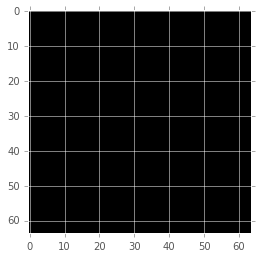

Epoch/Iteration: 201, Training Error= 1998.09


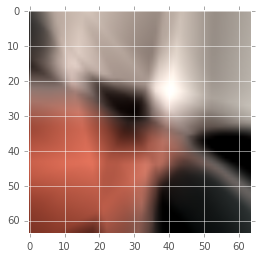

Epoch/Iteration: 401, Training Error= 1250.67


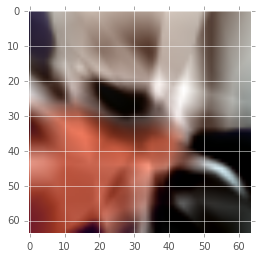

Epoch/Iteration: 601, Training Error= 916.33


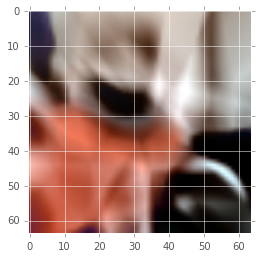

Epoch/Iteration: 801, Training Error= 881.049


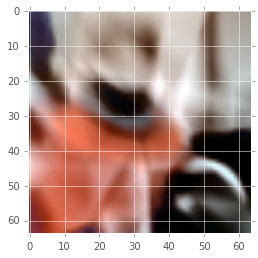

Epoch/Iteration: 1001, Training Error= 669.378


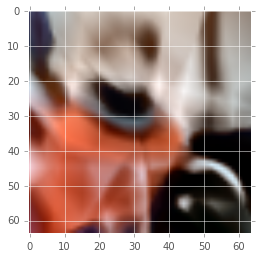

Epoch/Iteration: 1201, Training Error= 742.136


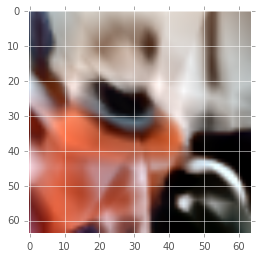

Epoch/Iteration: 1401, Training Error= 576.511


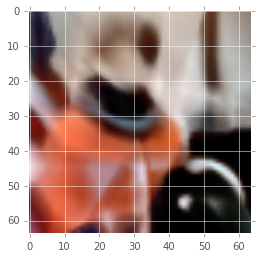

Epoch/Iteration: 1601, Training Error= 563.945


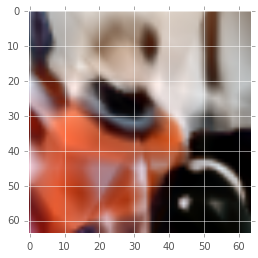

Epoch/Iteration: 1801, Training Error= 423.985


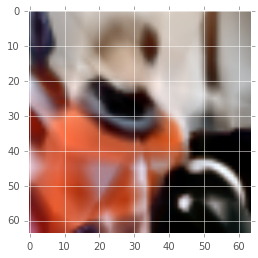

Epoch/Iteration: 2000, Training Error= 454.36


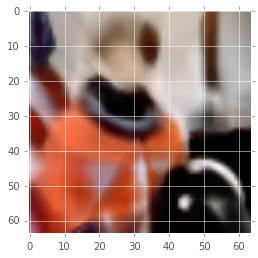

In [120]:
# We creates mini batches

# fig, axs = plt.subplots(1,1,figsize=(10,5))#,facecolor='w', edgecolor='k')
# axs.scatter(xData, yData, alpha=0.15, marker='+')
numDataPoints = X.shape[0]
numBatches = 8
batchSize = numDataPoints // numBatches


# xDataND = xData.reshape(numDataPoints, numFeatures)
# print (xDataND.shape)
miniBatchLearning(xData=X, 
                  yData=Y,
                  y_pred=y_tf_pred,
                  numDataPoints=numDataPoints,
                  batchSize=batchSize, 
                  numBatches=numBatches,
                  numIteration=2000)

# ROUGH:
------

In [102]:
ops.reset_default_graph()
# sess = tf.InteractiveSession()

In [101]:
p = np.array([[1,5],[2,3]], dtype='float32')
q = np.array([[2,1],[3,1]], dtype='float32')

y=tf.placeholder(shape=[2,2], dtype=tf.float32, name='yy')
yhat=tf.placeholder(shape=[2,2], dtype=tf.float32, name='yhat')
sqdiff = tf.squared_difference(y, yhat)
cost = tf.reduce_mean(sqdiff)
# print (a.get_shape().as_list())
# print (a.eval())

with tf.Session() as sess:
    y_y, y_hat, sq_diff, co_st = sess.run([y, yhat, sqdiff, cost], feed_dict={y : p, yhat:q})
    print (y_y)
    print (y_hat)
    print (sq_diff)
    print (co_st)

[[ 1.  5.]
 [ 2.  3.]]
[[ 2.  1.]
 [ 3.  1.]]
[[  1.  16.]
 [  1.   4.]]
5.5
